In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets,metrics,svm
from sklearn.model_selection import train_test_split

In [2]:
#pobieranie danych
digits = datasets.load_digits()

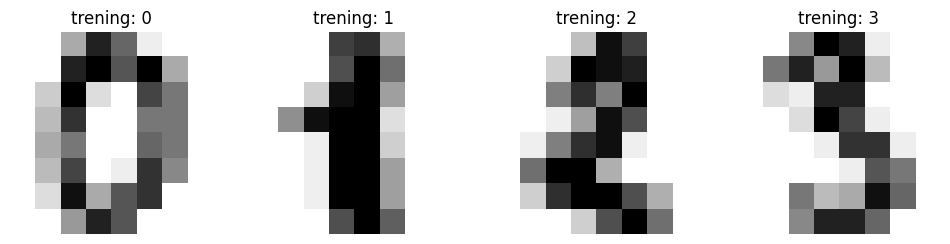

In [7]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(12,4))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"trening: {label}")

In [4]:
n_samples = len(digits.images)
n_samples

1797

In [8]:
#klasyfikator svm
clf = svm.SVC(gamma=0.001, C=1)

In [9]:
digits.images.shape

(1797, 8, 8)

In [10]:
data = digits.images.reshape(n_samples,-1) #macierz 8x8 -> wektor: 64

In [11]:
data[:10]

array([[ 0., 0., 5., 13., 9., 1., 0., 0., 0., 0., 13., 15., 10.,
 15., 5., 0., 0., 3., 15., 2., 0., 11., 8., 0., 0., 4.,
 12., 0., 0., 8., 8., 0., 0., 5., 8., 0., 0., 9., 8.,
 0., 0., 4., 11., 0., 1., 12., 7., 0., 0., 2., 14., 5.,
 10., 12., 0., 0., 0., 0., 6., 13., 10., 0., 0., 0.],
 [ 0., 0., 0., 12., 13., 5., 0., 0., 0., 0., 0., 11., 16.,
 9., 0., 0., 0., 0., 3., 15., 16., 6., 0., 0., 0., 7.,
 15., 16., 16., 2., 0., 0., 0., 0., 1., 16., 16., 3., 0.,
 0., 0., 0., 1., 16., 16., 6., 0., 0., 0., 0., 1., 16.,
 16., 6., 0., 0., 0., 0., 0., 11., 16., 10., 0., 0.],
 [ 0., 0., 0., 4., 15., 12., 0., 0., 0., 0., 3., 16., 15.,
 14., 0., 0., 0., 0., 8., 13., 8., 16., 0., 0., 0., 0.,
 1., 6., 15., 11., 0., 0., 0., 1., 8., 13., 15., 1., 0.,
 0., 0., 9., 16., 16., 5., 0., 0., 0., 0., 3., 13., 16.,
 16., 11., 5., 0., 0., 0., 0., 3., 11., 16., 9., 0.],
 [ 0., 0., 7., 15., 13., 1., 0., 0., 0., 8., 13., 6., 15.,
 4., 0., 0., 0., 2., 1., 13., 13., 0., 0., 0., 0., 0.,
 2., 15., 11., 1., 0., 0., 0., 0., 0., 1., 12., 12., 1.,
 0., 0., 0., 0., 0., 1., 10., 8., 0., 0., 0., 8., 4.,
 5., 14., 9., 0., 0., 0., 7., 13., 13., 9., 0., 0.],
 [ 0., 0., 0., 1., 11., 0., 0., 0., 0., 0., 0., 7., 8.,
 0., 0., 0., 0., 0., 1., 13., 6., 2., 2., 0., 0., 0.,
 7., 15., 0., 9., 8., 0., 0., 5., 16., 10., 0., 16., 6.,
 0., 0., 4., 15., 16., 13., 16., 1., 0., 0., 0., 0., 3.,
 15., 10., 0., 0., 0., 0., 0., 2., 16., 4., 0., 0.],
 [ 0., 0., 12., 10., 0., 0., 0., 0., 0., 0., 14., 16., 16.,
 14., 0., 0., 0., 0., 13., 16., 15., 10., 1., 0., 0., 0.,
 11., 16., 16., 7., 0., 0., 0., 0., 0., 4., 7., 16., 7.,
 0., 0., 0., 0., 0., 4., 16., 9., 0., 0., 0., 5., 4.,
 12., 16., 4., 0., 0., 0., 9., 16., 16., 10., 0., 0.],
 [ 0., 0., 0., 12., 13., 0., 0., 0., 0., 0., 5., 16., 8.,
 0., 0., 0., 0., 0., 13., 16., 3., 0., 0., 0., 0., 0.,
 14., 13., 0., 0., 0., 0., 0., 0., 15., 12., 7., 2., 0.,
 0., 0., 0., 13., 16., 13., 16., 3., 0., 0., 0., 7., 16.,
 11., 15., 8., 0., 0., 0., 1., 9., 15., 11., 3., 0.],
 [ 0., 0., 7., 8., 13., 16., 15., 1., 0., 0., 7., 7., 4.,
 11., 12., 0., 0., 0., 0., 0., 8., 13., 1., 0., 0., 4.,
 8., 8., 15., 15., 6., 0., 0., 2., 11., 15., 15., 4., 0.,
 0., 0., 0., 0., 16., 5., 0., 0., 0., 0., 0., 9., 15.,
 1., 0., 0., 0., 0., 0., 13., 5., 0., 0., 0., 0.],
 [ 0., 0., 9., 14., 8., 1., 0., 0., 0., 0., 12., 14., 14.,
 12., 0., 0., 0., 0., 9., 10., 0., 15., 4., 0., 0., 0.,
 3., 16., 12., 14., 2., 0., 0., 0., 4., 16., 16., 2., 0.,
 0., 0., 3., 16., 8., 10., 13., 2., 0., 0., 1., 15., 1.,
 3., 16., 8., 0., 0., 0., 11., 16., 15., 11., 1., 0.],
 [ 0., 0., 11., 12., 0., 0., 0., 0., 0., 2., 16., 16., 16.,
 13., 0., 0., 0., 3., 16., 12., 10., 14., 0., 0., 0., 1.,
 16., 1., 12., 15., 0., 0., 0., 0., 13., 16., 9., 15., 2.,
 0., 0., 0., 0., 3., 0., 9., 11., 0., 0., 0., 0., 0.,
 9., 15., 4., 0., 0., 0., 9., 12., 13., 3., 0., 0.]])

In [13]:
#podział zbioru
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)

In [14]:
X_train[:5]

array([[ 0., 0., 5., 13., 9., 1., 0., 0., 0., 0., 13., 15., 10.,
 15., 5., 0., 0., 3., 15., 2., 0., 11., 8., 0., 0., 4.,
 12., 0., 0., 8., 8., 0., 0., 5., 8., 0., 0., 9., 8.,
 0., 0., 4., 11., 0., 1., 12., 7., 0., 0., 2., 14., 5.,
 10., 12., 0., 0., 0., 0., 6., 13., 10., 0., 0., 0.],
 [ 0., 0., 0., 12., 13., 5., 0., 0., 0., 0., 0., 11., 16.,
 9., 0., 0., 0., 0., 3., 15., 16., 6., 0., 0., 0., 7.,
 15., 16., 16., 2., 0., 0., 0., 0., 1., 16., 16., 3., 0.,
 0., 0., 0., 1., 16., 16., 6., 0., 0., 0., 0., 1., 16.,
 16., 6., 0., 0., 0., 0., 0., 11., 16., 10., 0., 0.],
 [ 0., 0., 0., 4., 15., 12., 0., 0., 0., 0., 3., 16., 15.,
 14., 0., 0., 0., 0., 8., 13., 8., 16., 0., 0., 0., 0.,
 1., 6., 15., 11., 0., 0., 0., 1., 8., 13., 15., 1., 0.,
 0., 0., 9., 16., 16., 5., 0., 0., 0., 0., 3., 13., 16.,
 16., 11., 5., 0., 0., 0., 0., 3., 11., 16., 9., 0.],
 [ 0., 0., 7., 15., 13., 1., 0., 0., 0., 8., 13., 6., 15.,
 4., 0., 0., 0., 2., 1., 13., 13., 0., 0., 0., 0., 0.,
 2., 15., 11., 1., 0., 0., 0., 0., 0., 1., 12., 12., 1.,
 0., 0., 0., 0., 0., 1., 10., 8., 0., 0., 0., 8., 4.,
 5., 14., 9., 0., 0., 0., 7., 13., 13., 9., 0., 0.],
 [ 0., 0., 0., 1., 11., 0., 0., 0., 0., 0., 0., 7., 8.,
 0., 0., 0., 0., 0., 1., 13., 6., 2., 2., 0., 0., 0.,
 7., 15., 0., 9., 8., 0., 0., 5., 16., 10., 0., 16., 6.,
 0., 0., 4., 15., 16., 13., 16., 1., 0., 0., 0., 0., 3.,
 15., 10., 0., 0., 0., 0., 0., 2., 16., 4., 0., 0.]])

In [15]:
y_train[:5]

array([0, 1, 2, 3, 4])

In [16]:
clf.fit(X_train,y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
predicted = clf.predict(X_test)

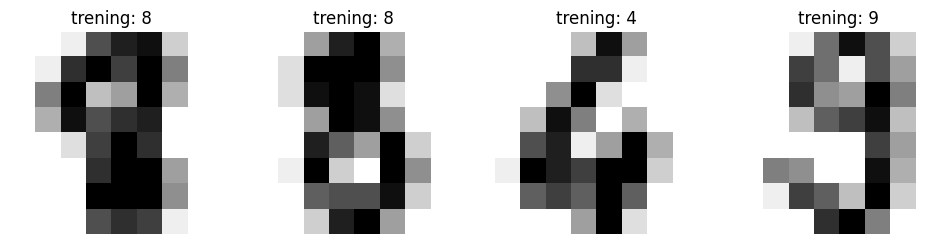

In [18]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(12,4))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"trening: {prediction}")

In [19]:
#ocena modelu
print(f"raport klasyfikacji dla {clf} -> \n{metrics.classification_report(y_test,predicted)}")

raport klasyfikacji dla SVC(C=1, gamma=0.001) -> 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Text(0.5, 0.98, 'Macierz pomyłek')

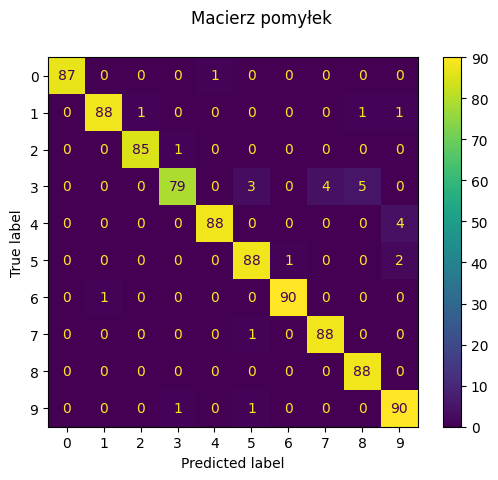

In [20]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")